In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pickle

import warnings

warnings.filterwarnings('ignore')

In [9]:
#load the cleaned dtaset 
def load_cleaned_data():
    """Load the cleaned main_df from data_prepocessing"""
    try:
        with open("../data/processed/main_df_cleaned.pkl", "rb") as f:
            main_df = pickle.load(f)
        print(f"Load cleaned data: {main_df.shape}")
        return main_df
    except FileNotFoundError:
        print("Cleaned data file not found. Run data_preprocessing first.")
        return None
        

In [11]:
main_df=load_cleaned_data()

if main_df is not None:
    print("Read for viz!")
    print(main_df.head())

Load cleaned data: (112650, 33)
Read for viz!
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1       

Business Questions +Viz 

Text(0, 0.5, 'Revenue')

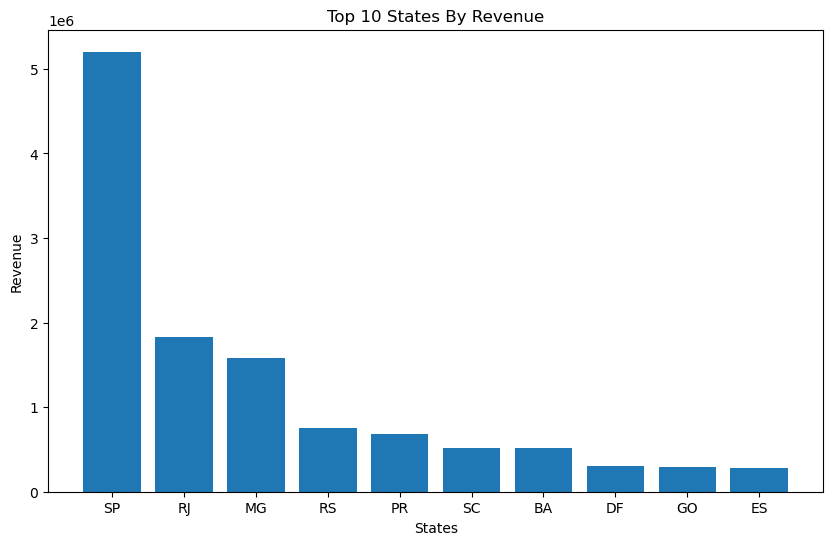

In [15]:
#barchart -questions which stater generate the most revenue 
state_revenue = main_df.groupby('customer_state')['price'].sum().sort_values(ascending=False).head(10)
fig, ax= plt.subplots(figsize=(10, 6))
ax.bar(state_revenue.index, state_revenue.values)
ax.set_title('Top 10 States By Revenue')
ax.set_xlabel('States')
ax.set_ylabel('Revenue')

Text(0.5, 1.0, 'Top 10 Product Categories by Volume')

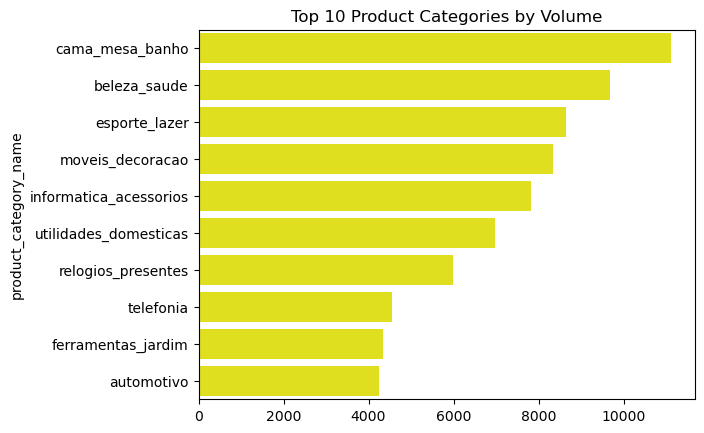

In [21]:
#question 2- which product categories sell the most
category_sales= main_df['product_category_name'].value_counts().head(10)
sns.barplot(x=category_sales.values, y=category_sales.index, color='yellow')
plt.title("Top 10 Product Categories by Volume")

In [39]:
monthly_sales= main_df.groupby(['order_year', 'order_month'])['price'].sum().reset_index()


AttributeError: Text.set() got an unexpected keyword argument 'rotatation'

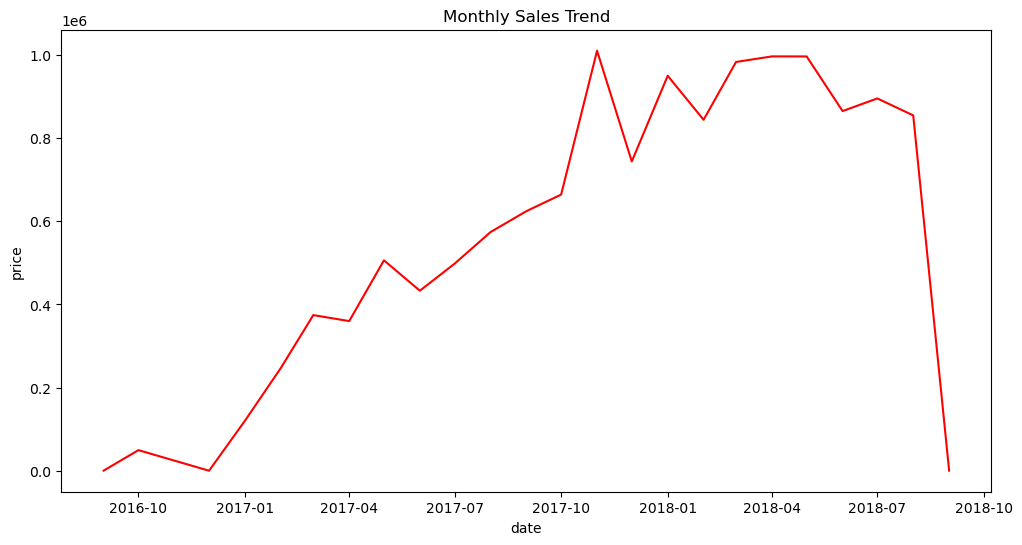

In [41]:
#Questions -how do sales trend monthly over time?
monthly_sales['date']= monthly_sales['order_year'].astype(str) + '-' + monthly_sales['order_month'].astype(str) + '-01'
monthly_sales['date'] =pd.to_datetime(monthly_sales['date'])

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='date', y='price', color='red')
plt.title("Monthly Sales Trend")
plt.xticks(rotatation =45)
plt.tight_layout()
plt.show()




Text(0.5, 36.72222222222221, 'Hour of Day')

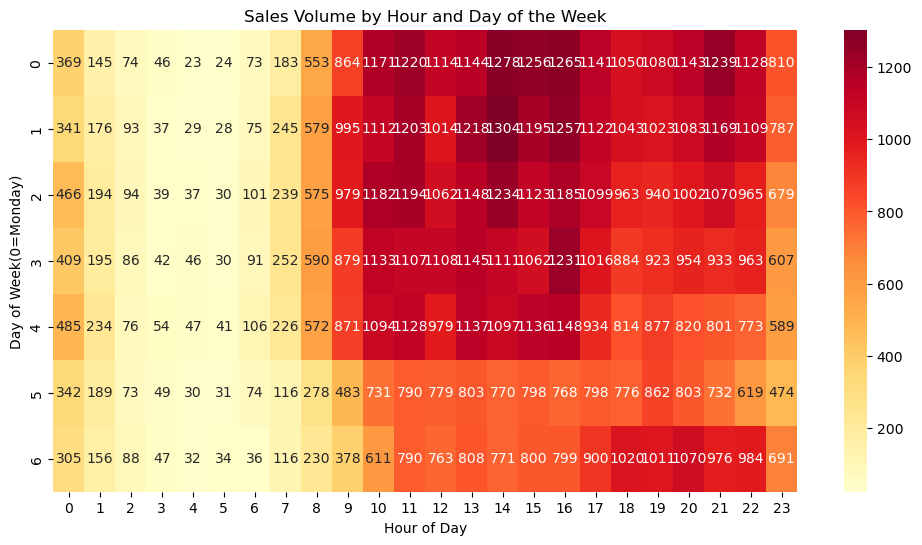

In [31]:
#Heatmaps- when do customers shop the most(hour vs day of the week)?

hourly_daily= main_df.groupby(['order_day_of_week', 'order_hour'])['price'].count().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(hourly_daily, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Sales Volume by Hour and Day of the Week')
plt.ylabel('Day of Week(0=Monday)')
plt.xlabel('Hour of Day')

Text(0.5, 1.0, 'Price Distribution by Product Category')

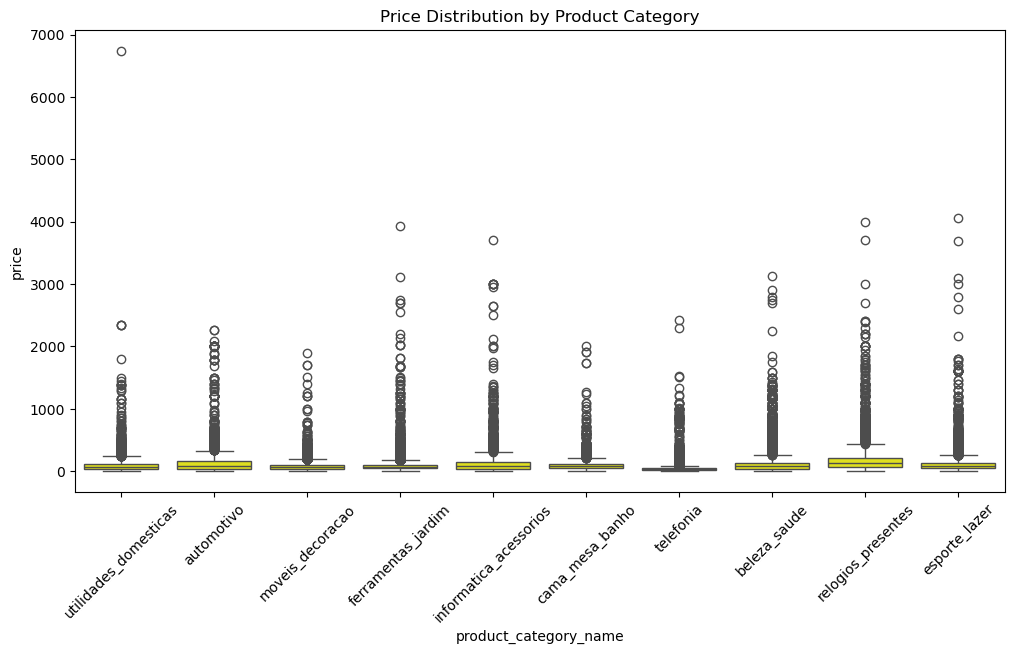

In [33]:
#   Question -how do prices vary across product categories
#Top 10 categories for readability 
top_categories= main_df['product_category_name'].value_counts().head(10).index
filtered_df =main_df[main_df['product_category_name'].isin(top_categories)]

plt.figure(figsize=(12, 6))
sns.boxplot(data= filtered_df, x='product_category_name', y='price', color='yellow')
plt.xticks(rotation= 45)
plt.title('Price Distribution by Product Category')